IMPORTING IMPORTANT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

MOUNTING DRIVE

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


FUNCTION DEFINITIONS

In [ ]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [ ]:
def cost_function_L2(X,y,w,lam):
  hypothesis = sigmoid(np.dot(X,w.T))
  J = -1 / len(y) * np.sum(y*np.log(hypothesis)+(1-y)*np.log(1-hypothesis)) + lam*np.sum(w**2)/2
  return J

In [ ]:
def cost_function_L1(X,y,w,lam):
  hypothesis = sigmoid(np.dot(X,w.T))
  J = -1 / len(y) * np.sum(y*np.log(hypothesis)+(1-y)*np.log(1-hypothesis)) + lam*np.abs(np.sum(w))/2
  return J

In [ ]:
def batch_gradient_descent_L2(X,y,w,alpha,iters,lam):
  cost_history = np.zeros(iters)
  for i in range(iters):
    hypothesis = np.dot(X,w.T)
    w = (1-alpha*lam)*w - (alpha/len(y)) * np.dot(hypothesis - y,X)
    cost_history[i] = cost_function_L2(X,y,w,lam)
  return w,cost_history

In [ ]:
def batch_gradient_descent_L1(X,y,w,alpha,iters,lam):
  cost_history = np.zeros(iters)
  for i in range(iters):
    hypothesis = np.dot(X,w.T)
    w = (1-(np.sign(np.sum(w)))*alpha*lam/2)*w - (alpha/len(y)) * np.dot(hypothesis - y,X)
    cost_history[i] = cost_function_L1(X,y,w,lam)
  return w,cost_history

In [ ]:
def mini_batch_gradient_descent_L2(X,y,w,alpha,iters,batch_size,lam):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y))
    ind_x = X[rand_index:rand_index + batch_size]
    ind_y = y[rand_index:rand_index + batch_size]
    w = (1-alpha*lam)*w - (alpha/batch_size) * (ind_x.T.dot(ind_x.dot(w) - ind_y))
    cost_history[i] = cost_function_L2(ind_x,ind_y,w,lam)
  return w,cost_history

In [ ]:
def mini_batch_gradient_descent_L1(X,y,w,alpha,iters,batch_size,lam):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y))
    ind_x = X[rand_index:rand_index + batch_size]
    ind_y = y[rand_index:rand_index + batch_size]
    w =  (1-np.sign(np.sum(w))*alpha*lam/2)*w - (alpha/batch_size) * (ind_x.T.dot(ind_x.dot(w) - ind_y))
    cost_history[i] = cost_function_L1(ind_x,ind_y,w,lam)
  return w,cost_history

In [ ]:
def stochastic_gradient_descent_L2(X,y,w,alpha,iters,lam):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y))
    ind_x = X[rand_index:rand_index + 1]
    ind_y = y[rand_index:rand_index + 1]
    w = (1-alpha*lam)*w - alpha * (ind_x.T.dot(ind_x.dot(w) - ind_y))
    cost_history[i] = cost_function_L2(ind_x,ind_y,w,lam)
  return w,cost_history

In [ ]:
def stochastic_gradient_descent_L1(X,y,w,alpha,iters,lam):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y))
    ind_x = X[rand_index:rand_index + 1]
    ind_y = y[rand_index:rand_index + 1]
    w =  (1-np.sign(np.sum(w))*alpha*lam/2)*w - alpha * (ind_x.T.dot(ind_x.dot(w) - ind_y))
    cost_history[i] = cost_function_L1(ind_x,ind_y,w,lam)
  return w,cost_history

EVALUATION METRICS

In [ ]:
def specs(X_test,y_test,w):  
  TN, FN, TP, FP = 0, 0, 0, 0

  y_pred = np.dot(Normalise(X_test), w)
  y_pred = sigmoid(y_pred)
  y_pred[y_pred > 0.5] = 1
  y_pred[y_pred <= 0.5] = 0

  TP = np.sum(y_pred * y_test)
  FP = np.sum(y_pred * (1-y_test))
  FN = np.sum((1-y_pred) * y_test)
  TN = np.sum((1-y_pred) * (1-y_test))

  sensitivity = TP/(TP + FN)
  specificity = TN/(TN + FP)
  accuracy = (TP + TN)/(TP + TN + FP + FN)*100

  return sensitivity, specificity, accuracy

DATA PRE-PROCESSING

In [ ]:
from random import Random
data = pd.read_excel("/content/gdrive/MyDrive/NNFL_ASSIGNMENT_1/data_q4_q5.xlsx")
Random(14).shuffle(data.values)
X = data.drop("diagnosis",axis=1)
y = data["diagnosis"]
y = (y == 'M')
m = len(X)
X_train = X[:int(m*0.7)]
X_val = X[int(m*0.7):int(m*0.8)]
X_test = X[int(m*0.8):]
y_train = y[:int(m*0.7)]
y_val = y[int(m*0.7):int(m*0.8)]
y_test = y[int(m*0.8):]

In [ ]:
def Normalise(X):
  mean = X.mean()
  std = np.std(X,axis=0)
  m = len(X)
  X_norm = (X-mean)/std
  X_norm = np.c_[np.ones((m, 1)), X_norm]
  return X_norm

In [ ]:
w = np.zeros(X.shape[1]+1)

BATCH GRADIENT DESCENT

In [ ]:
alpha = 0.0001
iters = 4000
lam = 0.1
batch_w_L2, J_his_batch_L2 = batch_gradient_descent_L2(Normalise(X_train),y_train,w,alpha,iters,lam)

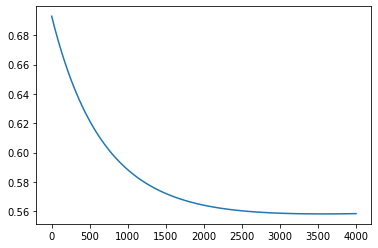

In [ ]:
plt.plot(range(iters),J_his_batch_L2)
plt.show()

In [ ]:
alpha = 0.0001
iters = 4000
lam = 0.1
batch_w_L1, J_his_batch_L1 = batch_gradient_descent_L1(Normalise(X_train),y_train,w,alpha,iters,lam)

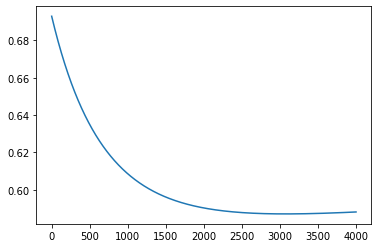

In [ ]:
plt.plot(range(iters),J_his_batch_L1)
plt.show()

EVALUATION METRICS

In [ ]:
def five_fold_batch_L2(X,y):
  sensitivity = []
  specificity = []
  accuracy = []
  Cost_values = []
  w = np.zeros(X.shape[1]+1)
  m = len(y)
  for i in range(5):
    X_test = X[int(i*m*0.2):int((i+1)*m*0.2)]
    X_train = pd.concat([X, X_test, X_test]).drop_duplicates(keep=False)
    y_test = y[int(i*m*0.2):int((i+1)*m*0.2)]
    y_train = y_train = y.drop(y_test.index)
    batch_w, J_his_batch = batch_gradient_descent_L2(Normalise(X_train) ,y_train ,w,0.0001,4000,0.001)
    Cost = cost_function_L2(Normalise(X_test),y_test,batch_w,0.01) 
    Cost_values.append(Cost)
    a,b,c = specs(X_test,y_test,batch_w) 
    sensitivity.append(a)
    specificity.append(b)
    accuracy.append(c)

  return Cost_values, sensitivity, specificity, accuracy

In [ ]:
Cost_values, sensitivity, specificity, accuracy = five_fold_batch_L2(X,y)
print('All Cost Values :', Cost_values)
print('All sensitivities :', sensitivity)
print('All specificities :', specificity)
print('All accuracies :', accuracy,'%')

All Cost Values : [0.5546820719211124, 0.5655758683433965, 0.5632362803381215, 0.5949982546415733, 0.6176357081825764]
All sensitivities : [0.9411764705882353, 0.9795918367346939, 0.975, 1.0, 1.0]
All specificities : [0.9333333333333333, 0.8307692307692308, 0.8648648648648649, 0.7411764705882353, 0.5681818181818182]
All accuracies : [93.80530973451327, 89.47368421052632, 90.35087719298247, 80.7017543859649, 66.66666666666666] %


In [ ]:
print('Least Cost Value :', min(Cost_values))
print('best sensitivity :', max(sensitivity))
print('best specificity :', max(specificity))
print('best accuracy :', max(accuracy),'%')

Least Cost Value : 0.5546820719211124
best sensitivity : 1.0
best specificity : 0.9333333333333333
best accuracy : 93.80530973451327 %


In [ ]:
def five_fold_batch_L1(X,y):
  sensitivity = []
  specificity = []
  accuracy = []
  Cost_values = []
  w = np.zeros(X.shape[1]+1)
  m = len(y)
  for i in range(5):
    X_test = X[int(i*m*0.2):int((i+1)*m*0.2)]
    X_train = pd.concat([X, X_test, X_test]).drop_duplicates(keep=False)
    y_test = y[int(i*m*0.2):int((i+1)*m*0.2)]
    y_train = y_train = y.drop(y_test.index)
    batch_w, J_his_batch = batch_gradient_descent_L1(Normalise(X_train) ,y_train ,w,0.0001,4000,0.001)
    Cost = cost_function_L1(Normalise(X_test),y_test,batch_w,0.01) 
    Cost_values.append(Cost)
    a,b,c = specs(X_test,y_test,batch_w) 
    sensitivity.append(a)
    specificity.append(b)
    accuracy.append(c)

    

  return Cost_values, sensitivity, specificity, accuracy

In [ ]:
Cost_values, sensitivity, specificity, accuracy = five_fold_batch_L1(X,y)
print('All Cost Values :', Cost_values)
print('All sensitivities :', sensitivity)
print('All specificities :', specificity)
print('All accuracies :', accuracy,'%')

All Cost Values : [0.5574636678959198, 0.5684773322673898, 0.5662164642857276, 0.5979213059385335, 0.620632311295795]
All sensitivities : [0.9411764705882353, 0.9795918367346939, 0.975, 1.0, 1.0]
All specificities : [0.9333333333333333, 0.8307692307692308, 0.8648648648648649, 0.7411764705882353, 0.5681818181818182]
All accuracies : [93.80530973451327, 89.47368421052632, 90.35087719298247, 80.7017543859649, 66.66666666666666] %


In [ ]:
print('Least Cost Value :', min(Cost_values))
print('best sensitivity :', max(sensitivity))
print('best specificity :', max(specificity))
print('best accuracy :', max(accuracy),'%')

Least Cost Value : 0.5574636678959198
best sensitivity : 1.0
best specificity : 0.9333333333333333
best accuracy : 93.80530973451327 %


MINI BATCH GRADIENT DESCENT

In [ ]:
alpha = 0.0001
iters = 4000
batch_size = 50
lam = 0.1
mini_batch_w_L2, J_his_mini_batch_L2 = mini_batch_gradient_descent_L2(Normalise(X_train),y_train,w,alpha,iters,batch_size,lam)

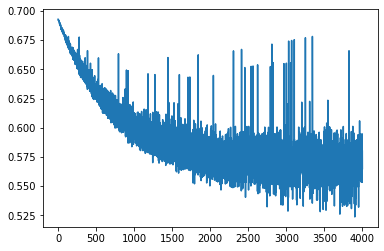

In [ ]:
plt.plot(range(iters),J_his_mini_batch_L2)
plt.show()

In [ ]:
alpha = 0.0001
iters = 4000
batch_size = 50
lam = 0.1
mini_batch_w_L1, J_his_mini_batch_L1 = mini_batch_gradient_descent_L1(Normalise(X_train),y_train,w,alpha,iters,batch_size,lam)


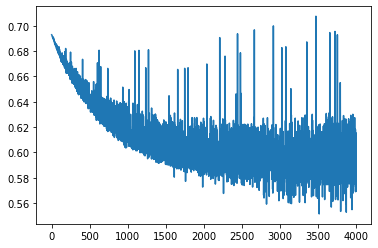

In [ ]:
plt.plot(range(iters),J_his_mini_batch_L1)
plt.show()

EVALUATION METRICS

In [ ]:
def five_fold_mini_batch_L2(X,y):
  sensitivity = []
  specificity = []
  accuracy = []
  Cost_values = []
  w = np.zeros(X.shape[1]+1)
  m = len(y)
  for i in range(5):
    X_test = X[int(i*m*0.2):int((i+1)*m*0.2)]
    X_train = pd.concat([X, X_test, X_test]).drop_duplicates(keep=False)
    y_test = y[int(i*m*0.2):int((i+1)*m*0.2)]
    y_train = y_train = y.drop(y_test.index)
    batch_w, J_his_batch = mini_batch_gradient_descent_L2(Normalise(X_train) ,y_train ,w,0.0001,4000,50,0.001)
    Cost = cost_function_L2(Normalise(X_test),y_test,batch_w,0.01) 
    Cost_values.append(Cost)
    a,b,c = specs(X_test,y_test,batch_w) 
    sensitivity.append(a)
    specificity.append(b)
    accuracy.append(c)

    

  return Cost_values, sensitivity, specificity, accuracy

In [ ]:
Cost_values, sensitivity, specificity, accuracy = five_fold_mini_batch_L2(X,y)
print('All Cost Values :', Cost_values)
print('All sensitivities :', sensitivity)
print('All specificities :', specificity)
print('All accuracies :', accuracy,'%')

All Cost Values : [0.5561873462384606, 0.5698902773498267, 0.5679288998989077, 0.5973467973297504, 0.6186134321276424]
All sensitivities : [0.9411764705882353, 0.9795918367346939, 0.975, 1.0, 1.0]
All specificities : [0.9333333333333333, 0.8461538461538461, 0.8783783783783784, 0.7294117647058823, 0.5681818181818182]
All accuracies : [93.80530973451327, 90.35087719298247, 91.22807017543859, 79.82456140350878, 66.66666666666666] %


In [ ]:
print('Least Cost Value :', min(Cost_values))
print('best sensitivity :', max(sensitivity))
print('best specificity :', max(specificity))
print('best accuracy :', max(accuracy),'%')

Least Cost Value : 0.5561873462384606
best sensitivity : 1.0
best specificity : 0.9333333333333333
best accuracy : 93.80530973451327 %


In [ ]:
def five_fold_mini_batch_L1(X,y):
  sensitivity = []
  specificity = []
  accuracy = []
  Cost_values = []
  w = np.zeros(X.shape[1]+1)
  m = len(y)
  for i in range(5):
    X_test = X[int(i*m*0.2):int((i+1)*m*0.2)]
    X_train = pd.concat([X, X_test, X_test]).drop_duplicates(keep=False)
    y_test = y[int(i*m*0.2):int((i+1)*m*0.2)]
    y_train = y_train = y.drop(y_test.index)
    batch_w, J_his_batch = mini_batch_gradient_descent_L1(Normalise(X_train) ,y_train ,w,0.0001,4000,50,0.001)
    Cost = cost_function_L1(Normalise(X_test),y_test,batch_w,0.01) 
    Cost_values.append(Cost)
    a,b,c = specs(X_test,y_test,batch_w) 
    sensitivity.append(a)
    specificity.append(b)
    accuracy.append(c)

    

  return Cost_values, sensitivity, specificity, accuracy

In [ ]:
Cost_values, sensitivity, specificity, accuracy = five_fold_mini_batch_L2(X,y)
print('All Cost Values :', Cost_values)
print('All sensitivities :', sensitivity)
print('All specificities :', specificity)
print('All accuracies :', accuracy,'%')

All Cost Values : [0.5568189645059156, 0.5716799922447726, 0.5680837733243909, 0.5980523793836653, 0.6185718174840664]
All sensitivities : [0.9411764705882353, 0.9795918367346939, 0.975, 1.0, 1.0]
All specificities : [0.9333333333333333, 0.8461538461538461, 0.8783783783783784, 0.7411764705882353, 0.5681818181818182]
All accuracies : [93.80530973451327, 90.35087719298247, 91.22807017543859, 80.7017543859649, 66.66666666666666] %


In [ ]:
print('Least Cost Value :', min(Cost_values))
print('best sensitivity :', max(sensitivity))
print('best specificity :', max(specificity))
print('best accuracy :', max(accuracy),'%')

Least Cost Value : 0.5568189645059156
best sensitivity : 1.0
best specificity : 0.9333333333333333
best accuracy : 93.80530973451327 %


STOCHASTIC GRADIENT DESCENT

In [ ]:
alpha = 0.0001
lam = 0.1
iters = 4000
stochastic_w_L2, J_his_stochastic_L2 = stochastic_gradient_descent_L2(Normalise(X_train),y_train,w,alpha,iters, lam)

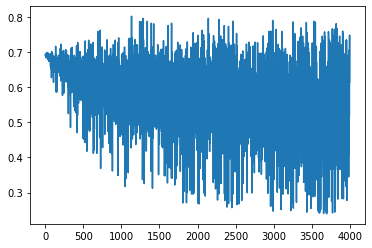

In [ ]:
plt.plot(range(iters),J_his_stochastic_L2)
plt.show()

In [ ]:
alpha = 0.0001
lam = 0.1
iters = 4000
stochastic_w_L1, J_his_stochastic_L1 = stochastic_gradient_descent_L1(Normalise(X_train),y_train,w,alpha,iters, lam)

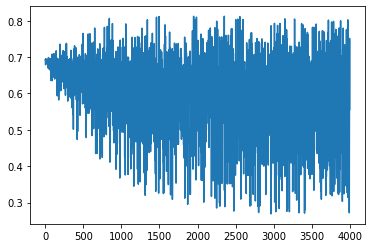

In [ ]:
plt.plot(range(iters),J_his_stochastic_L1)
plt.show()

EVALUATION METRICS

In [ ]:
def five_fold_stochastic_batch_L2(X,y):
  sensitivity = []
  specificity = []
  accuracy = []
  Cost_values = []
  w = np.zeros(X.shape[1]+1)
  m = len(y)
  for i in range(5):
    X_test = X[int(i*m*0.2):int((i+1)*m*0.2)]
    X_train = pd.concat([X, X_test, X_test]).drop_duplicates(keep=False)
    y_test = y[int(i*m*0.2):int((i+1)*m*0.2)]
    y_train = y_train = y.drop(y_test.index)
    batch_w, J_his_batch = stochastic_gradient_descent_L2(Normalise(X_train) ,y_train ,w,0.0001,4000,0.001)
    Cost = cost_function_L2(Normalise(X_test),y_test,batch_w,0.01) 
    Cost_values.append(Cost)
    a,b,c = specs(X_test,y_test,batch_w) 
    sensitivity.append(a)
    specificity.append(b)
    accuracy.append(c)

    

  return Cost_values, sensitivity, specificity, accuracy

In [ ]:
Cost_values, sensitivity, specificity, accuracy = five_fold_stochastic_batch_L2(X,y)
print('All Cost Values :', Cost_values)
print('All sensitivities :', sensitivity)
print('All specificities :', specificity)
print('All accuracies :', accuracy,'%')

All Cost Values : [0.5573617524692251, 0.5645004740811812, 0.5626706676298462, 0.5941418064355439, 0.6171830881954828]
All sensitivities : [0.9411764705882353, 0.9795918367346939, 0.975, 1.0, 1.0]
All specificities : [0.9333333333333333, 0.8, 0.8513513513513513, 0.7411764705882353, 0.5568181818181818]
All accuracies : [93.80530973451327, 87.71929824561403, 89.47368421052632, 80.7017543859649, 65.78947368421053] %


In [ ]:
print('Least Cost Value :', min(Cost_values))
print('best sensitivity :', max(sensitivity))
print('best specificity :', max(specificity))
print('best accuracy :', max(accuracy),'%')

Least Cost Value : 0.5573617524692251
best sensitivity : 1.0
best specificity : 0.9333333333333333
best accuracy : 93.80530973451327 %


In [ ]:
def five_fold_stochastic_batch_L1(X,y):
  sensitivity = []
  specificity = []
  accuracy = []
  Cost_values = []
  w = np.zeros(X.shape[1]+1)
  m = len(y)
  for i in range(5):
    X_test = X[int(i*m*0.2):int((i+1)*m*0.2)]
    X_train = pd.concat([X, X_test, X_test]).drop_duplicates(keep=False)
    y_test = y[int(i*m*0.2):int((i+1)*m*0.2)]
    y_train = y_train = y.drop(y_test.index)
    batch_w, J_his_batch = stochastic_gradient_descent_L1(Normalise(X_train) ,y_train ,w,0.0001,4000,0.001)
    Cost = cost_function_L1(Normalise(X_test),y_test,batch_w,0.01) 
    Cost_values.append(Cost)
    a,b,c = specs(X_test,y_test,batch_w) 
    sensitivity.append(a)
    specificity.append(b)
    accuracy.append(c)

    

  return Cost_values, sensitivity, specificity, accuracy

In [ ]:
Cost_values, sensitivity, specificity, accuracy = five_fold_stochastic_batch_L2(X,y)
print('All Cost Values :', Cost_values)
print('All sensitivities :', sensitivity)
print('All specificities :', specificity)
print('All accuracies :', accuracy,'%')

All Cost Values : [0.5536508466043838, 0.5604205374710689, 0.5598098039239768, 0.5958421587191094, 0.614704263827509]
All sensitivities : [0.9411764705882353, 0.9795918367346939, 0.975, 1.0, 1.0]
All specificities : [0.9333333333333333, 0.8461538461538461, 0.8648648648648649, 0.7294117647058823, 0.5795454545454546]
All accuracies : [93.80530973451327, 90.35087719298247, 90.35087719298247, 79.82456140350878, 67.54385964912281] %


In [ ]:
print('Least Cost Value :', min(Cost_values))
print('best sensitivity :', max(sensitivity))
print('best specificity :', max(specificity))
print('best accuracy :', max(accuracy),'%')

Least Cost Value : 0.5536508466043838
best sensitivity : 1.0
best specificity : 0.9333333333333333
best accuracy : 93.80530973451327 %
